In [2]:
%pwd

%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning_빅데16

/content/drive/MyDrive/Colab Notebooks/DeepLearning_빅데16


### 목표
- 폐암 환자의 생존을 예측하는 분류 모델을 만들어보자(0:사망, 1:생존)
- 다층퍼셉트론(신경망)을 활용하여 이진분류 문제를 해결해보자.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# 데이터 불러오기
# header : 데이터 불러오면서 사용할 인덱스 
# None : 인덱스 번호로 컬럼명 출력하기
data = pd.read_csv("./data/ThoraricSurgery.csv", header=None)
data

# 앞에 0~16번 까지 17개는 특성 데이터 17번 컬럼 데이터는 정답데이터( 0: 사망, 1: 생존)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [21]:
# 데이터 크기 확인
data.shape

(470, 18)

In [32]:
# 문제와 답으로 분리
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [33]:
# 크기확인
print(X.shape)
print(y.shape)

(470, 17)
(470,)


In [31]:
from sklearn.model_selection import train_test_split
# 훈련용, 테스트용 분리
# 7:3
# 고정 5
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =5)

In [29]:
# 크기확인
print("훈련용", X_train.shape, y_train.shape)
print("테스트용", X_test.shape, y_test.shape)

훈련용 (329, 17) (329,)
테스트용 (141, 17) (141,)


#### keras를 활용하여 딥러닝 신경망 구축
- 1. 신경망 구조 설계
- 2. 학습/평가 방법 설정
- 3. 학습 + 시각화
- 4. 평가 + 예측

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Dense 안에 있는 매개변수 값으로 활성화함수연결


In [42]:
# 1. 신경망 구조 설계
model = Sequential() # 뼈대 구축

# 입력층(input_dim : 특성의 개수) + 중간층 1
model.add(Dense(units=10,input_dim=17, activation='sigmoid'))


# 중간층 
model.add(Dense(units = 6, activation='sigmoid')) # 퍼셉트론 층
model.add(Dense(units = 4, activation='sigmoid')) # 퍼셉트론 층
# 활성화 : 자극에 대한 반응여부를 결정

# 출력층
# 이진 분류(0,1)
# 회귀(유닛 개수 : 1개, 활성화함수 : linear 선형함수(항등함수))

# 이진 분류
model.add(Dense(units = 1, activation='sigmoid')) 
# sigmoid를 통해서 0~1사이의 확률 정보로 출력

# 0.5 기준 값 크면 1 , 작으면 0으로 분류 된다.

# 모델 정보 요약 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                180       
                                                                 
 dense_14 (Dense)            (None, 6)                 66        
                                                                 
 dense_15 (Dense)            (None, 4)                 28        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


In [48]:
# 2. 학습/ 평가 방법 설정
# model.compile(손실함수, 최적함수, 평가지표 연결)
# 이진 분류 손실 함수 : binary_crossentropy
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [51]:
# 3. 모델 학습
# 학습 반복 횟수 : epochs
h = model.fit(X_train, y_train,epochs=100)

Epoch 1/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8541
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8541
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8541
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8541
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8541
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8541
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8541
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8541
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8541
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8541
Epoch 11/

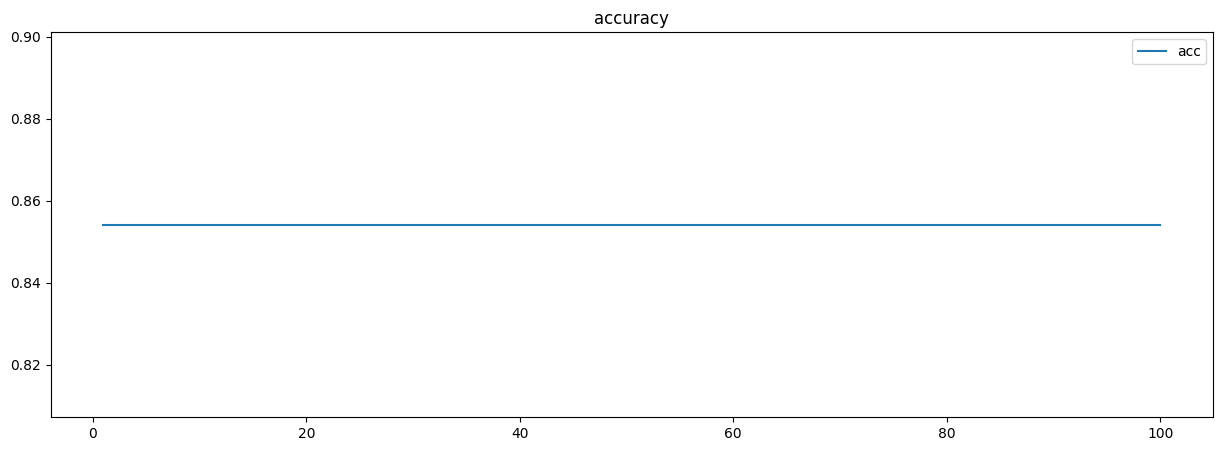

In [57]:
# 3. 시각화
# 학습이 반복될때마다 정확도 변화 그래프

plt.figure(figsize=(15,5))
plt.title("accuracy")
plt.plot(range(1,101), 
         h.history['accuracy'],label='acc')
plt.legend()
plt.show()

In [60]:
# 4. 모델 평가
# evaluate()
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.4337 - accuracy: 0.8440


[0.4337332844734192, 0.8439716100692749]

In [72]:
# 5. 모델 예측
pre = model.predict(X_test)
pre

# 0~1 출력된 값을 해석
# 기준 값 0.5를 기준으로 밑이면 0, 아니면 1로 예측

pre2 = pre>0.5

# 혼동행렬 표

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pre2)
display(cm)

# 데이터 프레임 변환
cm_df = pd.DataFrame(cm, index=['실제0', '실제 1'],columns=['예측0', '예측1'])
cm_df

5/5 [==============================] - 0s 2ms/step


array([[119,   0],
       [ 22,   0]])

,예측0,예측1
실제0,119,0
실제 1,22,0
